In [4]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [5]:
import matplotlib.pyplot as plt
!pwd

/export/home/orenkobo


In [6]:
import datetime
print(datetime.datetime.now())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.keras import backend as K
print(K._get_available_gpus())

2022-04-10 10:34:21.873146
Num GPUs Available:  1
['/device:GPU:0']


In [7]:
import datetime
import joblib
from tensorflow import keras
from tensorflow.keras import layers

# scale_col = "x_gaze_location_standard_scaled"

def apply_phq_cutoff(df , neg_phq_cutoff, pos_phq_cutoff):
    df["phq_binary_label"] = [0.0 if x <= neg_phq_cutoff else 1.0 if x >= pos_phq_cutoff else "other" for x in df.phq_score]
    df = df[df.phq_binary_label!= 'other']
    return df


def get_timecols_df_for_DL(fn,
                           scale_col):

    import string, re
    print(f"{datetime.datetime.now()} Reading csv from {fn}")
    df = pd.read_csv(fn,
                     index_col=None,
                     converters={#'alephbert_enc': eval,
                         scale_col : eval,
                         # 'x_gaze_location_minmax_scaled' : eval,
                         # 'x_gaze_location_standard_scaled' : eval,
                         # 'target_word_x_range' : eval
                         # 'phq_label': bool
                     })
    print(df.shape)


    df = df[df.Sentence_type != 'F'].reset_index(drop=True)


    id_cols = ["phq_score","phq_group","Subject", "Sentence_type",
               "sentence_pupil_diameter_mean","set_num"]
    # vec_size = 3500
    # new_colname = f"x_gaze_location_{vec_size}"
    cols = [f"timepoint#{i}" for i in range(875)]
    # df[new_colname] = df["x_gaze_location_standard_scaled"].apply(lambda x : x[:vec_size])
    timeseries_df = pd.DataFrame(data = df[scale_col].to_list() , columns = cols)
    timeseries_df[id_cols] = df[id_cols]
    timeseries_df = timeseries_df.iloc[:,200:]
    cols = [x for x in timeseries_df.columns if "timepoint" in x]
    return timeseries_df, cols

In [8]:
import pandas as pd
d = {}
# df_fn = "/export/home/orenkobo/Aim1/paper_analysis/Artifacts/df_new_full__unsegmented_alldata_new_FINAL.csv"
df_fn = "/export/home/orenkobo/Aim1/paper_analysis/Artifacts/df_new_full__unsegmented_alldata_new_FINAL_paparanalysis.csv"
# df_fn = "/Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_full__unsegmented_alldata_new_FINAL.csv"
et_scale_col = "x_gaze_location_standard_scaled"
# et_scale_col = "x_gaze_location_rescaled"
override_cutoff = [7,8]
df, timepoint_cols = get_timecols_df_for_DL(fn =df_fn, scale_col = et_scale_col)
df = apply_phq_cutoff(df,
                      neg_phq_cutoff = override_cutoff[0],
                      pos_phq_cutoff = override_cutoff[1])


cond_df = pd.get_dummies(df['Sentence_type'])
cond_cols = cond_df.columns.tolist()
df = pd.concat([df, cond_df],axis=1)
df = df.reset_index(drop=True)
df

2022-04-10 10:34:23.934687 Reading csv from /export/home/orenkobo/Aim1/paper_analysis/Artifacts/df_new_full__unsegmented_alldata_new_FINAL_paparanalysis.csv
(9696, 32)


,timepoint#200,timepoint#201,timepoint#202,timepoint#203,timepoint#204,timepoint#205,timepoint#206,timepoint#207,timepoint#208,timepoint#209,...,phq_group,Subject,Sentence_type,sentence_pupil_diameter_mean,set_num,phq_binary_label,A,B,C,D
0,1.248853,1.242846,1.250856,1.257864,1.246851,1.239843,1.238841,1.250856,1.242846,1.239843,...,Mild,3,A,5110.630668,17,0.0,1,0,0,0
1,-0.605603,-0.604602,-0.602600,-0.590588,-1.061065,-1.648661,-1.700713,-1.695708,-1.703717,-1.710724,...,Mild,3,B,4974.146741,5,0.0,0,1,0,0
2,0.127316,0.133326,0.121306,0.099268,0.104277,0.115296,0.122307,0.124311,0.135330,0.161374,...,Mild,3,D,4739.278462,12,0.0,0,0,0,1
3,-1.144312,-1.155340,-1.149325,-1.117245,-1.106217,-1.129275,-1.135290,-1.111230,-1.109224,-1.127270,...,Mild,3,A,4775.260020,6,0.0,1,0,0,0
4,-1.554332,-1.571359,-1.577369,-1.608418,-1.600405,-1.571359,-1.558338,-1.560341,-1.565349,-1.573362,...,Mild,3,B,4746.720839,26,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,-1.686416,-1.706449,-1.697434,-2.352531,-2.500779,-2.447690,-2.421646,-2.419643,-2.425653,-2.450695,...,Mild,139,D,5117.994088,0,1.0,0,0,0,1
3228,0.985337,0.997349,0.986338,0.976329,0.983335,0.991343,0.990342,0.994346,0.975328,0.977330,...,Mild,139,D,4995.187626,15,1.0,0,0,0,1
3229,1.002969,1.014985,0.504330,0.345126,0.339118,0.340120,0.351134,0.363149,0.364150,0.377167,...,Mild,139,A,4934.199434,27,1.0,1,0,0,0
3230,1.745621,1.753631,1.758638,1.737610,1.736609,1.735608,1.736609,1.741616,1.322060,1.367120,...,Mild,139,C,5056.427875,4,1.0,0,0,1,0


In [9]:
len(timepoint_cols)

675

In [10]:
df = df.ffill()
# df_to_take = df[timepoint_cols + ['phq_binary_label']].dropna().reset_index(drop=True)
X = df[timepoint_cols]
y = df['phq_binary_label']
print(df.shape, df.shape, X.shape, y.shape)

(3232, 686) (3232, 686) (3232, 675) (3232,)


In [11]:

from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
        input_shape,
        head_size,
        num_heads,
        ff_dim,
        num_transformer_blocks,
        mlp_units,
        dropout=0,
        mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [12]:
import tensorflow as tf
import os
logdir = os.path.join("logs_gaze_transformers", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
def run_keras_transformer(x_train, y_train, X_val, y_val):

    input_shape = x_train.shape[1:]
    #n_classes = len(np.unique(y_train_mock))
    n_classes = 1

    model = build_model(
        input_shape,
        head_size=256,
        num_heads=4,
        ff_dim=4,
        num_transformer_blocks=2,
        mlp_units=[32],
        mlp_dropout=0.4,
        dropout=0.25,
    )

    model.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        metrics=["acc"],
    )
    #model.summary()

    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=6, restore_best_weights=True),
                 tensorboard_callback]

    his = model.fit(
        x_train,
        keras.utils.to_categorical(y_train),

        # y_train,
        validation_data=(X_val, keras.utils.to_categorical(y_val)),
        epochs=30,
        batch_size=2,
        callbacks=callbacks,
    )
    return  model
# model.evaluate(x_test, y_test, verbose=1)

In [13]:
def calc_per_subj_pred(pred, d, n=32, reverse = False):
    if d==2:
        pred = [x[0] for x in pred]
    c = [pred[i * n:(i + 1) * n] for i in range((len(pred) + n - 1) // n )]
    l = pd.DataFrame(c).mean(axis=1)
    if reverse:
        l = l.apply(lambda x : 1-x)

    return l

In [14]:
from numpy.random import seed
import tensorflow as tf
# import keras
import random
import numpy as np
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

In [18]:
from sklearn.model_selection import GroupShuffleSplit, LeavePGroupsOut
import datetime
def rl(df):
    ids = df["Subject"].unique()
    random.shuffle(ids)
    df = df.set_index("Subject").loc[ids].reset_index()
    return df

def run_model(df, randomize_labels = False, n_test_subjs = 10, num_iters_per_cond= 100):
    # lpgo1 = LeavePGroupsOut(n_groups=10)
    res_dict = {}

    if randomize_labels:
        df = rl(df)

    for cond, cond_df in df.groupby(["Sentence_type"]):
        i = 0
        print(f"{datetime.datetime.now()} : =============== Train cond {cond} ===============")
        res_dict[cond] = {}
        cond_df = cond_df.reset_index(drop=True)
        cond_y = cond_df['phq_binary_label']
        lpgo1 = GroupShuffleSplit(n_splits=num_iters_per_cond, test_size=n_test_subjs, random_state=7)
        print(f"{datetime.datetime.now()} : Start")


        groups1 = cond_df['Subject']

        for tmp_index, test_index in lpgo1.split(X = cond_df[timepoint_cols] , y = cond_df['phq_binary_label'], groups = groups1):
            if i==num_iters_per_cond:
                break


            lpgo2 = LeavePGroupsOut(n_groups=n_test_subjs)
            # q = lpgo2.get_n_splits(groups = df.Subject)
            # print(q)
            # return
            # lpgo2 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjs, random_state=i)
            test_subjects = list(np.unique(groups1.iloc[test_index]))
            test_df = cond_df.iloc[test_index]
            tmp_df = cond_df.iloc[tmp_index]
            groups2 = tmp_df['Subject']
            # print(f"{groups1.iloc[tmp_index].nunique()} temp subjects :  {list(np.unique(groups1.iloc[tmp_index]))}")
            # folds = list(lpgo2.split(X = tmp_df[timepoint_cols] ,
            #                     y = tmp_df['phq_binary_label'],
            #                     groups = groups2))
            # X_shuffled, y_shuffled, groups_shuffled = shuffle(tmp_df[timepoint_cols] ,
            #                                                   tmp_df['phq_binary_label'] ,
            #                                                   groups2, random_state=0)
            # folds = lpgo2.split(X = X_shuffled[timepoint_cols] ,
            #                     y = y_shuffled,
            #                     groups = groups_shuffled)
            folds = lpgo2.split(X = tmp_df[timepoint_cols] ,
                                y = tmp_df['phq_binary_label'],
                                groups = groups2)

            train_index, val_index = next(folds)
            train_subjects = list(np.unique(groups2.iloc[train_index]))
            val_subjects = list(np.unique(groups2.iloc[val_index]))
            train_df = tmp_df.iloc[train_index]
            val_df = tmp_df.iloc[val_index]
            # for fold_i, (train_index, val_index) in enumerate(folds):
            # train_subjects = list(np.unique(groups2.iloc[train_index]))
            # val_subjects = list(np.unique(groups2.iloc[val_index]))
            # train_df = tmp_df.iloc[train_index]
            # val_df = tmp_df.iloc[val_index]
            # break
            # X_train, y_train = generate_3d_ds(train_df)
            # X_test, y_test = generate_3d_ds(test_df)
            # X_val, y_val = generate_3d_ds(val_df)

            print(f"{datetime.datetime.now(): Train Fold #{i} of cond {cond}}")
            assert ( len(list(set(train_subjects) & set(test_subjects))) == 0)
            assert ( len(list(set(val_subjects) & set(test_subjects))) == 0)
            assert ( len(list(set(val_subjects) & set(train_subjects))) == 0)
            X_train = train_df[timepoint_cols]
            X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

            X_test = test_df[timepoint_cols]
            X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

            X_val = val_df[timepoint_cols]
            X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

            y_train, y_test, y_val = cond_y.iloc[train_index].values, cond_y.iloc[test_index].values, cond_y.iloc[val_index].values

            model = run_keras_transformer(X_train, y_train, X_val, y_val)
            ev = model.evaluate(X_test, keras.utils.to_categorical(y_test), batch_size=128)
            fold_test_pred = model.predict(X_test)
            if i % 25 == 0:
                print(f"{datetime.datetime.now()} - Done training iter {i}, Eval is : {ev} (cond={cond})")

            res_dict[cond][i] = {}
            res_dict[cond][i]['evaluation'] = ev
            res_dict[cond][i]["test_subjects"] = test_subjects
            res_dict[cond][i]["test_pred"] = [x[0] for x in fold_test_pred]
            print("Shape of pred is " , fold_test_pred.shape)
            res_dict[cond][i]["per_subject_mean_pred"] = calc_per_subj_pred(fold_test_pred,d=2,n=8, reverse=True)
            print("Shape of per_subject_mean_pred" , res_dict[cond][i]["per_subject_mean_pred"].shape)
            # exit()
            res_dict[cond][i]["per_subject_label"] = calc_per_subj_pred(y_test,1,n=8)
            res_dict[cond][i]["per_subject_is_success"] = [True if round(p)==round(t) else False for p,t in
                                                     zip(res_dict[cond][i]["per_subject_mean_pred"],
                                                         res_dict[cond][i]["per_subject_label"])]
            res_dict[cond][i]['subj_level_acc'] = sum(res_dict[cond][i]["per_subject_is_success"]) / len(res_dict[cond][i]["per_subject_is_success"])
            print(f"{datetime.datetime.now()}: Finished cond {cond} Train Fold #{i} - thus far subj acc is "
                  f"{np.mean([res_dict[cond][x]['subj_level_acc'] for x in range(i)])} and regular acc is "
                  f"{np.mean([res_dict[cond][x]['evaluation'][1] for x in range(i)])}\n")

            i+=1
    return res_dict

In [ ]:
num_iters_per_cond = 300
n_test_subjs = 10
res_dict = run_model(df, randomize_labels = False, num_iters_per_cond = num_iters_per_cond)

2022-04-10 10:52:20.552072 : =============== Train cond A ===============
2022-04-10 10:52:20.553586 : Start
 Train Fold #0 of cond A
Epoch 1/30
324/324 [==============================] - 7s 14ms/step - loss: 0.7847 - acc: 0.4799 - val_loss: 0.6926 - val_acc: 0.5125
Epoch 2/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6845 - acc: 0.5741 - val_loss: 0.7104 - val_acc: 0.5625
Epoch 3/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6863 - acc: 0.5787 - val_loss: 0.7358 - val_acc: 0.4500
Epoch 4/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6739 - acc: 0.5756 - val_loss: 0.7305 - val_acc: 0.5000
Epoch 5/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6536 - acc: 0.6127 - val_loss: 0.7190 - val_acc: 0.5125
Epoch 6/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6285 - acc: 0.6173 - val_loss: 0.7199 - val_acc: 0.5625
Epoch 7/30
1/1 [==============================] - 0s 320ms/step - lo

/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


324/324 [==============================] - 5s 13ms/step - loss: 0.7470 - acc: 0.5278 - val_loss: 0.7100 - val_acc: 0.5000
Epoch 2/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6887 - acc: 0.5401 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 3/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6918 - acc: 0.5571 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 4/30
324/324 [==============================] - 4s 13ms/step - loss: 0.7157 - acc: 0.5664 - val_loss: 0.7059 - val_acc: 0.4625
Epoch 5/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6841 - acc: 0.5571 - val_loss: 0.7156 - val_acc: 0.4750
Epoch 6/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6795 - acc: 0.5802 - val_loss: 0.7047 - val_acc: 0.6000
Epoch 7/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6670 - acc: 0.5864 - val_loss: 0.7359 - val_acc: 0.4750
Epoch 8/30
324/324 [==============================] - 4s 13ms/step - loss: 0.657

/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


324/324 [==============================] - 5s 13ms/step - loss: 0.7620 - acc: 0.5355 - val_loss: 0.8131 - val_acc: 0.5000
Epoch 2/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6933 - acc: 0.5725 - val_loss: 0.7388 - val_acc: 0.5625
Epoch 3/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6826 - acc: 0.5864 - val_loss: 0.7330 - val_acc: 0.3875
Epoch 4/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6660 - acc: 0.6034 - val_loss: 0.7241 - val_acc: 0.5125
Epoch 5/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6679 - acc: 0.6250 - val_loss: 0.7509 - val_acc: 0.4625
Epoch 6/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6318 - acc: 0.6343 - val_loss: 0.7543 - val_acc: 0.4750
Epoch 7/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6234 - acc: 0.6605 - val_loss: 0.8117 - val_acc: 0.5000
Epoch 8/30
324/324 [==============================] - 4s 13ms/step - loss: 0.618

/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


324/324 [==============================] - 5s 13ms/step - loss: 0.7784 - acc: 0.5340 - val_loss: 0.7203 - val_acc: 0.5000
Epoch 2/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6955 - acc: 0.5355 - val_loss: 0.6947 - val_acc: 0.5500
Epoch 3/30
324/324 [==============================] - 4s 12ms/step - loss: 0.7331 - acc: 0.5340 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6918 - acc: 0.5432 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6911 - acc: 0.5432 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 6/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6904 - acc: 0.5432 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 7/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6908 - acc: 0.5386 - val_loss: 0.6948 - val_acc: 0.5000
Epoch 8/30
324/324 [==============================] - 4s 12ms/step - loss: 0.689

/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/share/apps/anaconda3-2021.05/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


324/324 [==============================] - 6s 14ms/step - loss: 0.7800 - acc: 0.5833 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 2/30
324/324 [==============================] - 4s 14ms/step - loss: 0.6898 - acc: 0.5586 - val_loss: 0.7393 - val_acc: 0.5000
Epoch 3/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6887 - acc: 0.5463 - val_loss: 0.7095 - val_acc: 0.5375
Epoch 4/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6838 - acc: 0.6019 - val_loss: 0.7265 - val_acc: 0.5375
Epoch 5/30
324/324 [==============================] - 4s 13ms/step - loss: 0.6589 - acc: 0.6281 - val_loss: 0.7042 - val_acc: 0.5125
Epoch 6/30
324/324 [==============================] - 4s 12ms/step - loss: 0.6684 - acc: 0.6420 - val_loss: 0.7754 - val_acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 318ms/step - loss: 0.6974 - acc: 0.4000
Shape of pred is  (80, 2)
Shape of per_subject_mean_pred (10,)
2022-04-10 21:05:16.565160: Finished cond D Train Fold #1

In [ ]:
#Traning loop on GGU is around 80 mins

In [ ]:
# import numpy as np
# from sklearn.model_selection import LeavePGroupsOut, GroupShuffleSplit
# from tensorflow.keras.callbacks import EarlyStopping
# num_iters = 100
# es_cb = EarlyStopping(monitor="val_loss", patience=3,  restore_best_weights=True)
# callbacks = [es_cb]
# res_dict = {}
# n_test_subjects = 10
# print(datetime.datetime.now())
#
# def rl(df):
#     ids = df["Subject"].unique()
#     random.shuffle(ids)
#     df = df.set_index("Subject").loc[ids].reset_index()
#     return df
#
# randomize_labels = True
# if randomize_labels:
#    df = rl(df)
#
# for cond, cond_df in df.groupby(["Sentence_type"]):
#     print(f"{datetime.datetime.now()} : Train cond {cond}")
#     res_dict[cond] = {}
#     cond_df = cond_df.reset_index(drop=True)
#     cond_y = cond_df['phq_binary_label']
#     groups1 = cond_df['Subject']
#     lpgo1 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjects, random_state=7)
#
#     i = 0
#     for tmp_index, test_index in lpgo1.split(X = cond_df[timepoint_cols] , y = cond_df['phq_binary_label'], groups = groups1):
#
#         print(f"{datetime.datetime.now()} : Train iter {i}/{num_iters} (cond {cond})")
#         if i==num_iters:
#             break
#         res_dict[cond][i] = {}
#         lpgo2 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjects, random_state=i)
#         test_subjects = list(np.unique(groups1.iloc[test_index]))
#         tmp_df = df.iloc[tmp_index]
#         groups2 = tmp_df['Subject']
#         for train_index, val_index in lpgo2.split(X = tmp_df[timepoint_cols] ,
#                                                   y = tmp_df['phq_binary_label'],
#                                                   groups = groups2):
#             train_subjects = list(np.unique(tmp_df.Subject.iloc[train_index]))
#             val_subjects = list(np.unique(tmp_df.Subject.iloc[val_index]))
#             train_df = tmp_df.iloc[train_index]
#             test_df = cond_df.iloc[test_index]
#             val_df = tmp_df.iloc[val_index]
#             break
#         assert ( len(list(set(train_subjects) & set(test_subjects))) == 0)
#         assert ( len(list(set(val_subjects) & set(test_subjects))) == 0)
#         assert ( len(list(set(val_subjects) & set(train_subjects))) == 0)
#         print(f"Train Subjs are {train_subjects}\nVal Subjs are {val_subjects}\nTest subjs are {test_subjects}")
#         X_train = cond_df.iloc[train_index][timepoint_cols]
#         X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
#
#         X_test = cond_df.iloc[test_index][timepoint_cols]
#         X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
#
#         X_val = cond_df.iloc[val_index][timepoint_cols]
#         X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
#
#         y_train, y_test, y_val = cond_y.iloc[train_index].values, cond_y.iloc[test_index].values, cond_y.iloc[val_index].values
#
#         model = run_keras_transformer(X_train, y_train, X_val, y_val)
#         print(f"{datetime.datetime.now()} - Done training iter {i}")
#         ev = model.evaluate(X_test, keras.utils.to_categorical(y_test), batch_size=128)
#         fold_test_pred = model.predict(X_test)
#         print(f"{datetime.datetime.now()} Eval is : {ev}")
#
#         res_dict[cond][i]['evaluation'] = ev
#         res_dict[cond][i]["test_subjects"] = test_subjects
#         res_dict[cond][i]["test_pred"] = [x[0] for x in fold_test_pred]
#         print("Shape of pred is " , fold_test_pred.shape)
#         res_dict[cond][i]["per_subject_mean_pred"] = calc_per_subj_pred(fold_test_pred,d=2,n=8, reverse=True)
#         print("Shape of per_subject_mean_pred" , res_dict[cond][i]["per_subject_mean_pred"].shape)
#         # exit()
#         res_dict[cond][i]["per_subject_label"] = calc_per_subj_pred(y_test,1,n=8)
#         res_dict[cond][i]["per_subject_is_success"] = [True if round(p)==round(t) else False for p,t in
#                                                  zip(res_dict[cond][i]["per_subject_mean_pred"],
#                                                      res_dict[cond][i]["per_subject_label"])]
#         res_dict[cond][i]['subj_level_acc'] = sum(res_dict[cond][i]["per_subject_is_success"]) / len(res_dict[cond][i]["per_subject_is_success"])
#         print(f"{datetime.datetime.now()}: Finished cond {cond} Train Fold #{i} - thus far subj acc is "
#               f"{np.mean([res_dict[cond][x]['subj_level_acc'] for x in range(i)])} and regular acc is "
#               f"{np.mean([res_dict[cond][x]['evaluation'][1] for x in range(i)])}\n")
#         i+=1
# print(datetime.datetime.now())

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model)

In [ ]:
print(datetime.datetime.now())
for c in ["A","B","C","D"]:
    print(f"{c} : {np.mean([res_dict[c][i]['subj_level_acc'] for i in range(3)])}")
    print(f"{c} : {np.mean([res_dict[c][i]['evaluation'][1] for i in range(3)])}")

In [ ]:
import joblib
from datetime import datetime

out_dir = "/export/home/orenkobo/Aim1/paper_analysis/Trained_models/"
# out_dir = "/Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks __For_Paper/Trained_models/"
ts = datetime.timestamp(datetime.now())

out_fn = f"{out_dir}LSTM_gaze_timeseries_output_object_{ts}"
model_dict_to_save = {"res_dict" : num_iters_per_cond, f"details" : f"Gaze Timeseries Keras Transformer, "
                                                                    f"{num_iters_per_cond} iters, "
                                                                f"{100-2*n_test_subjs}/{n_test_subjs}/{n_test_subjs} split"}

# random_dict_to_save = {"res_dict" : res_dict, f"details" : f"LSTM + cond embed, {num_iters} iters, "
#                                                                  f"{100-2*n_test_subjects}/{n_test_subjects}/{n_test_subjects} split"}
joblib.dump(model_dict_to_save, out_fn + ".jbl")
print("Saved model to ", out_fn)
# joblib.dump(random_dict_to_save, out_fn + "_RANDOM_.jbl")

In [18]:
per_subject_label = res_dict['A'][0]["per_subject_label"].tolist()
iter_accs = []
n_test_subjects = 8
for i in range(num_iters):
    per_subject_A_pred = res_dict['A'][i]["per_subject_mean_pred"].tolist()
    per_subject_B_pred = res_dict['B'][i]["per_subject_mean_pred"].tolist()
    per_subject_C_pred = res_dict['C'][i]["per_subject_mean_pred"].tolist()
    per_subject_D_pred = res_dict['D'][i]["per_subject_mean_pred"].tolist()

    iter_per_subj_pred  = []
    for subj_i in range(n_test_subjects):
        q = [per_subject_A_pred[subj_i],per_subject_B_pred[subj_i],
             per_subject_C_pred[subj_i],per_subject_D_pred[subj_i]]
        subject_agg_pred = np.mean(q)
        # subject_agg_pred = np.max(q)
        iter_per_subj_pred.append(subject_agg_pred)
    # iter_per_subj_pred = [0 if x > 0.3 else 0 for x in iter_per_subj_pred]
    iter_subj_acc = sum([True if round(p)==round(t) else False for p,t in
                     zip(iter_per_subj_pred, per_subject_label)]) / n_test_subjects
    print(f"iter {i} Acc {iter_subj_acc}")
    iter_accs.append(iter_subj_acc)
np.mean(iter_accs)

iter 0 Acc 0.875
iter 1 Acc 0.75
iter 2 Acc 0.875
iter 3 Acc 0.75
iter 4 Acc 0.875
iter 5 Acc 0.75
iter 6 Acc 0.625
iter 7 Acc 0.625
iter 8 Acc 0.625
iter 9 Acc 0.875
iter 10 Acc 0.5
iter 11 Acc 0.75
iter 12 Acc 0.75
iter 13 Acc 0.75
iter 14 Acc 0.5
iter 15 Acc 0.875
iter 16 Acc 0.5
iter 17 Acc 0.5
iter 18 Acc 0.875
iter 19 Acc 0.75
iter 20 Acc 0.75
iter 21 Acc 0.75
iter 22 Acc 0.875
iter 23 Acc 0.5
iter 24 Acc 0.875
iter 25 Acc 0.75
iter 26 Acc 0.625
iter 27 Acc 0.875
iter 28 Acc 0.625
iter 29 Acc 0.625
iter 30 Acc 0.5
iter 31 Acc 0.875
iter 32 Acc 0.875
iter 33 Acc 0.625
iter 34 Acc 0.75
iter 35 Acc 0.75
iter 36 Acc 0.875
iter 37 Acc 0.625
iter 38 Acc 0.5
iter 39 Acc 0.625
iter 40 Acc 0.5
iter 41 Acc 0.5
iter 42 Acc 0.875
iter 43 Acc 0.625
iter 44 Acc 0.875
iter 45 Acc 0.875
iter 46 Acc 0.875
iter 47 Acc 0.875
iter 48 Acc 0.625
iter 49 Acc 0.875
iter 50 Acc 0.375
iter 51 Acc 0.375
iter 52 Acc 1.0
iter 53 Acc 0.875
iter 54 Acc 0.375
iter 55 Acc 0.875
iter 56 Acc 0.75
iter 57 Acc 0.5
i

0.71625

In [19]:
per_subject_label

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]

In [20]:
len(res_dict['A'][0]["per_subject_mean_pred"].tolist())

10

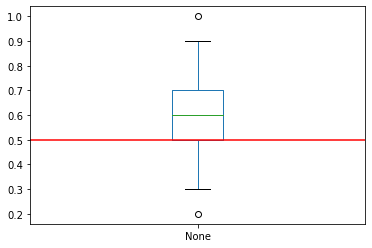

In [21]:
import matplotlib.pyplot as plt
pd.Series([res_dict[c][i]['subj_level_acc'] for i in range(num_iters) for c in ['A','B','C','D']]).plot.box()
plt.axhline(0.5, color='red')
plt.show()

In [ ]:
print(np.mean([res_dict[c][i]['subj_level_acc'] for i in range(num_iters) for c in ['A','B','C','D']]))
print(np.mean([res_dict[c][i]['evaluation'][1] for i in range(num_iters) for c in ['A','B','C','D']]))

In [ ]:
print(np.mean([res_dict[c][i]['subj_level_acc'] for i in range(num_iters) for c in ['A','B','C','D']]))
print(np.mean([res_dict[c][i]['evaluation'][1] for i in range(num_iters) for c in ['A','B','C','D']]))

In [ ]:
print(np.mean([res_dict[c][i]['subj_level_acc'] for i in range(num_iters) for c in ['A','B','C','D']]))
print(np.mean([res_dict[c][i]['evaluation'][1] for i in range(num_iters) for c in ['A','B','C','D']]))

In [ ]:
print(np.mean([res_dict[c][i]['subj_level_acc'] for i in range(num_iters) for c in ['A','B','C','D']]))
print(np.mean([res_dict[c][i]['evaluation'][1] for i in range(num_iters) for c in ['A','B','C','D']]))

In [ ]:
res_dict

In [ ]:
res_dict

In [ ]:
# for i in range(10):
# res_dict = {}
# for cond in ["A","B","C","D"]:
#     cond_df = df[df.Sentence_type == cond]
#     res_dict["sc_transformers"] = run_keras_transformer(x_train, y_train)

In [ ]:
df.shape